In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow import keras

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/tmp/ipykernel_224968/3076634767.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-06-01 13:36:05.062089: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 13:36:06.908788: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 13:36:10.327838: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FM

In [2]:
#pip install tensorflow

In [3]:
df = pd.read_csv('data_new.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         373 non-null    int64  
 1   Age (Kyr ago)      373 non-null    float64
 2   BIT index          373 non-null    float64
 3   Rescaled MST (°C)  373 non-null    float64
 4   CO2 (ppmv)         373 non-null    float64
 5   δ18O               373 non-null    float64
 6   GLT_syn            373 non-null    float64
 7   d18O_benthic       373 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.4 KB


In [5]:
#x = df[df.columns[3:]].to_numpy()
age = df[df.columns[1]].to_numpy()
x1 = df[df.columns[3]].to_numpy()[:: -1]
x2 = df[df.columns[4]].to_numpy()[:: -1]
x3 = df[df.columns[5]].to_numpy()[:: -1]
x4 = df[df.columns[6]].to_numpy()[:: -1]
x5 = df[df.columns[7]].to_numpy()[:: -1]
print(x1.shape)
x = np.stack((x1, x2, x3, x5), axis = 1)
y = df[df.columns[2]].to_numpy()[:: -1]

(373,)


In [6]:
scaler_poly = StandardScaler()
x_scaled = scaler_poly.fit_transform(x)
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.1, shuffle = False, stratify = None)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle = False, stratify = None)

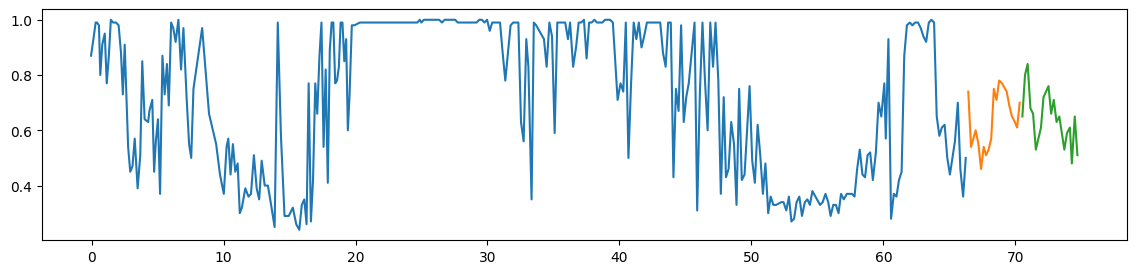

In [7]:
n = x_train.shape[0]
m = x_cv.shape[0]
#x_test.shape
plt.figure(figsize=(14,3))
plt.plot(age[:n],y_train)
plt.plot(age[n: n + m], y_cv)
plt.plot(age[ n + m :], y_test)

# 1.1 Neural network and Linear regression

In [8]:
linear_model = LinearRegression()
scaler_poly = StandardScaler()
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

#linear_model.fit(x_train_mapped_scaled, y_train)

In [9]:
 ridge_pipe = Pipeline([('scale',StandardScaler()),
                              ('poly',PolynomialFeatures(3, interaction_only=False, include_bias=False)),
                              ('ridge', Ridge(alpha = 30, max_iter=5000000))
                              ])

In [10]:
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=30, max_iter=5000000))])

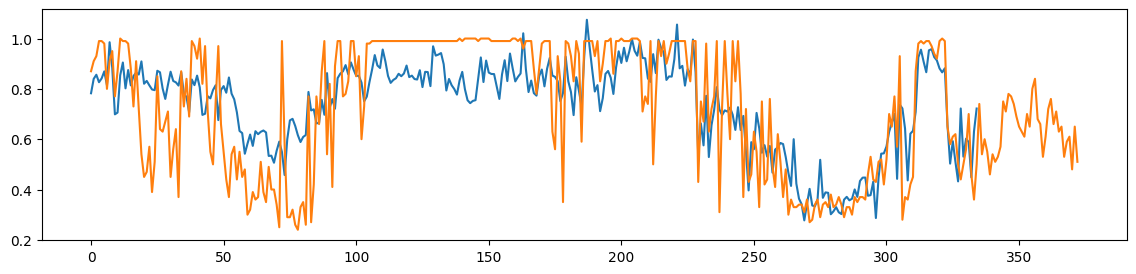

In [11]:
plt.figure(figsize=(14,3))
plt.plot(ridge_pipe.predict(x_train))
plt.plot(y)

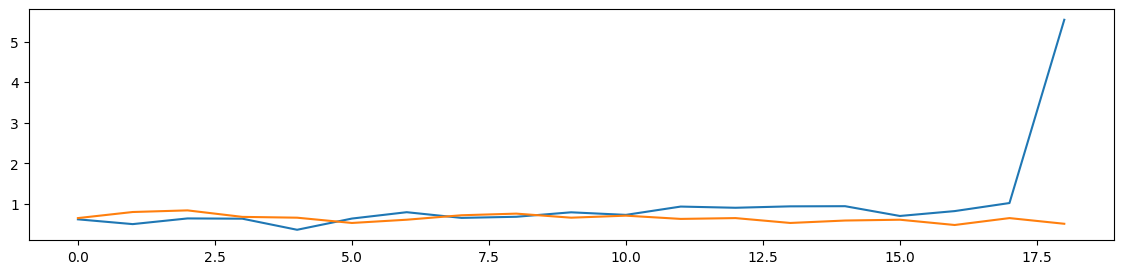

In [12]:
plt.figure(figsize=(14,3))
plt.plot(ridge_pipe.predict(x_test))
#print(x_test_mapped_scaled)
plt.plot(y_test)

In [13]:
print("MSE for the training_set:", mean_squared_error(y_train, ridge_pipe.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, ridge_pipe.predict(x_test)) / 2)

MSE for the training_set: 0.01474536233024386
MSE for the test_set: 0.6915104607624476


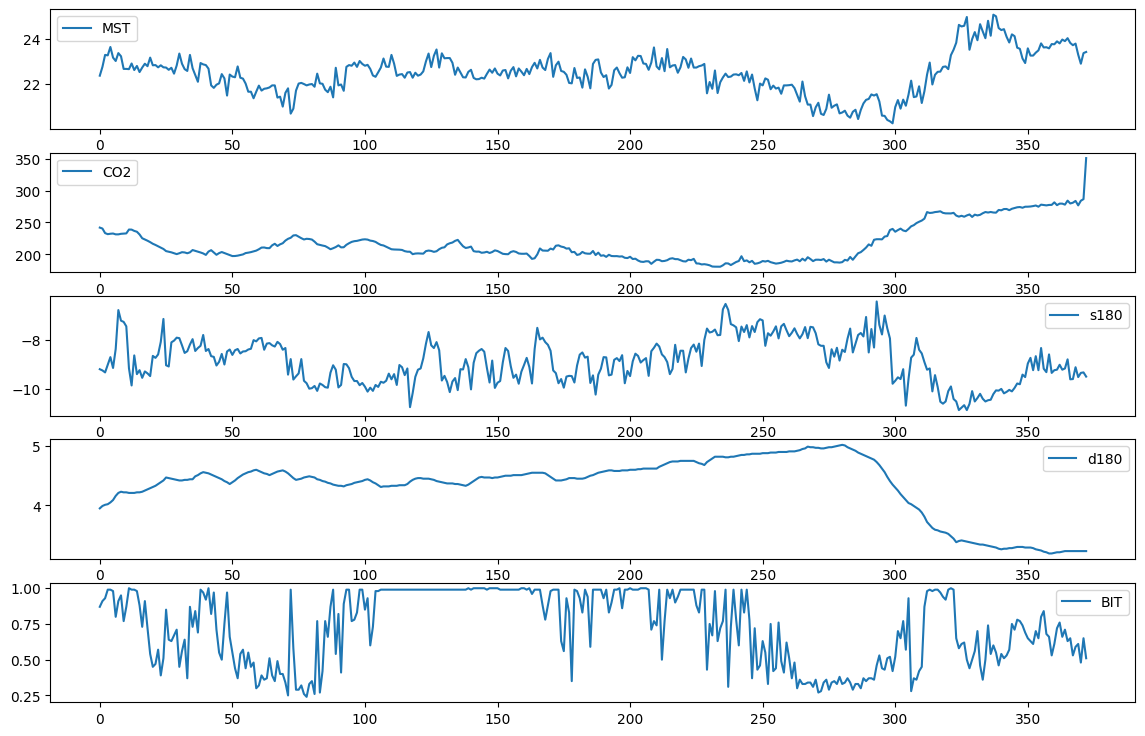

In [14]:
plt.figure(figsize=(14,9))

plt.subplot(511)
plt.plot(x1, label = 'MST')
plt.legend()
plt.subplot(512)
plt.plot(x2, label = 'CO2')
plt.legend()
plt.subplot(513)
plt.plot(x3, label = 's180')
plt.legend()
plt.subplot(514)
plt.plot(x5, label = 'd180')
plt.legend()
plt.subplot(515)
plt.plot(y, label = 'BIT')
plt.legend()

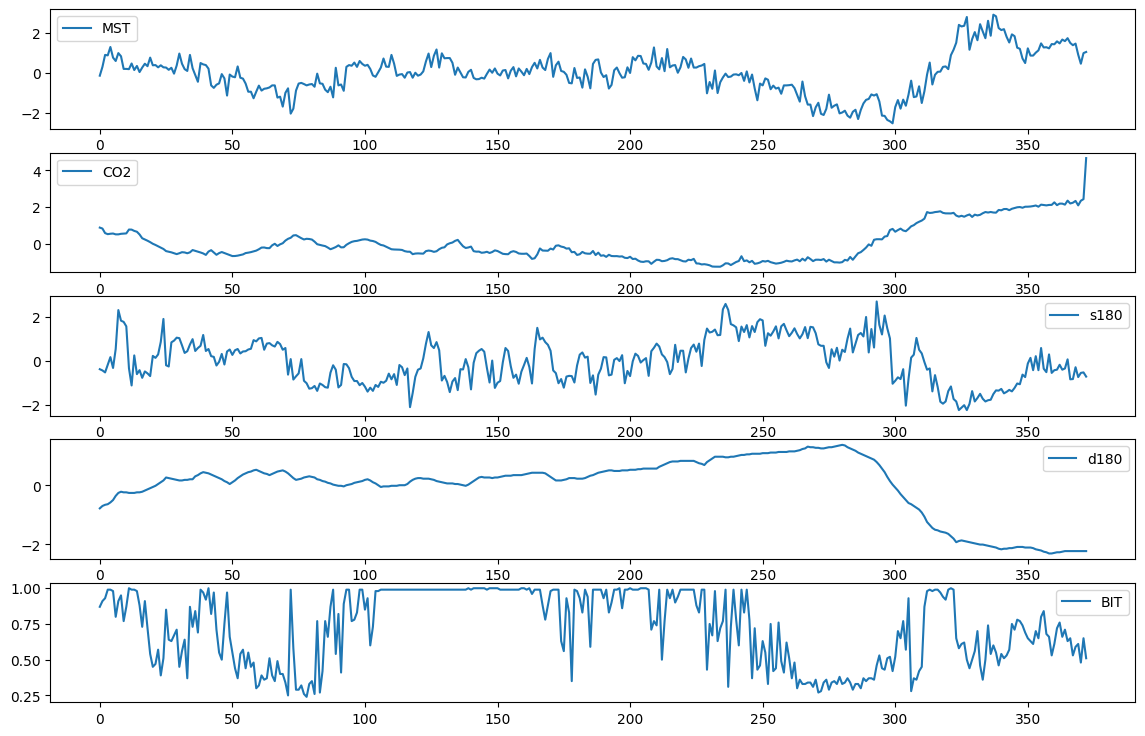

In [15]:
plt.figure(figsize=(14,9))

plt.subplot(511)
plt.plot(x_scaled[:, 0], label = 'MST')
plt.legend()
plt.subplot(512)
plt.plot(x_scaled[:, 1], label = 'CO2')
plt.legend()
plt.subplot(513)
plt.plot(x_scaled[:, 2], label = 's180')
plt.legend()
plt.subplot(514)
plt.plot(x_scaled[:, 3], label = 'd180')
plt.legend()
plt.subplot(515)
plt.plot(y, label = 'BIT')
plt.legend()

In [144]:
reg = 0.0034
model_2 = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size 
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True, activation = "sigmoid")
 
  ], name = "my_model" 
)

In [145]:
model_2.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [158]:
history = model_2.fit(
    x_train, y_train,
    epochs=600,  validation_data=(x_cv, y_cv)
)

Epoch 1/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0485 - val_loss: 0.0406
Epoch 2/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - val_loss: 0.0408
Epoch 3/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - val_loss: 0.0462
Epoch 4/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - val_loss: 0.0398
Epoch 5/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0502 - val_loss: 0.0455
Epoch 6/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - val_loss: 0.0400
Epoch 7/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - val_loss: 0.0404
Epoch 8/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - val_loss: 0.0450
Epoch 9/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0510 - val_loss: 0.0416
Epoch 10/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - val_loss: 0.0407
Epoch 11/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - val_loss: 0.0413
Epoch 12/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

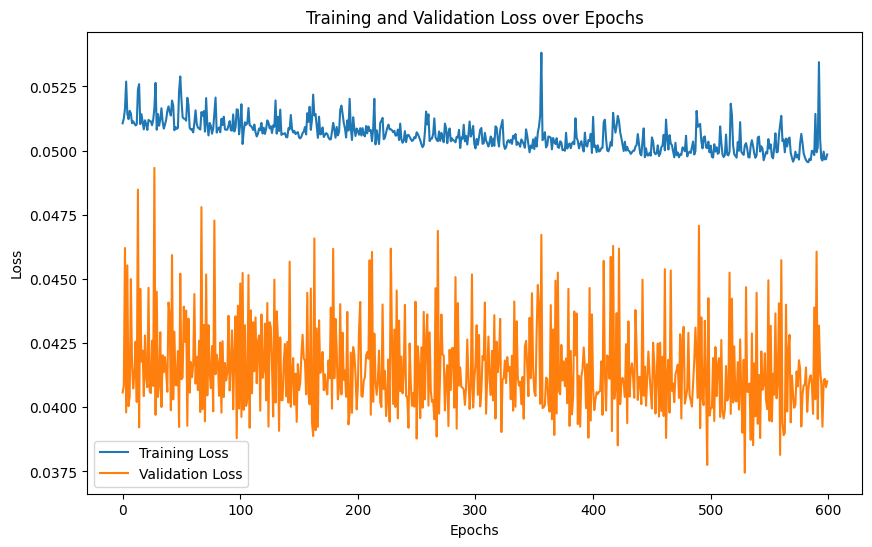

In [159]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
#plt.savefig('loss_curve.png')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE for the training_set: 0.013509755207814651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE for the test_set: 0.009284369723183321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


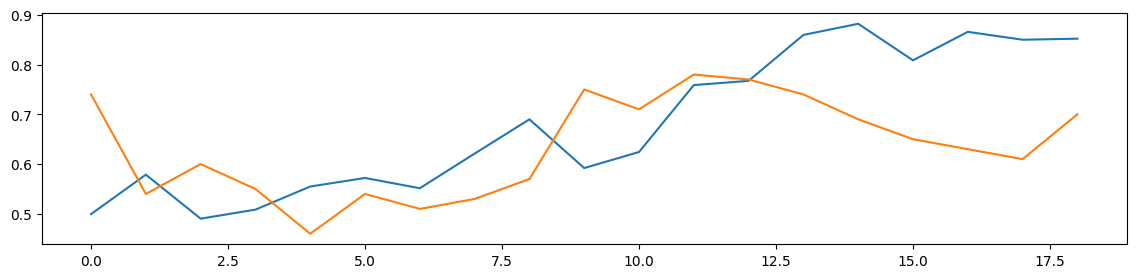

In [160]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_2.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_cv, model_2.predict(x_cv)) / 2)
plt.plot(model_2.predict(x_cv))
plt.plot(y_cv)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


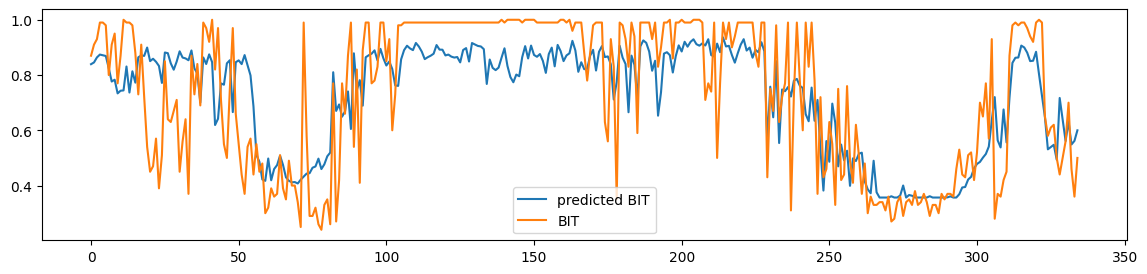

In [161]:
plt.figure(figsize=(14,3))
plt.plot(model_2.predict(x_train), label = 'predicted BIT')
plt.plot(y_train, label = 'BIT')
plt.legend()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MSE for the training_set: 0.013509755207814651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MSE for the test_set: 0.0134334753096994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


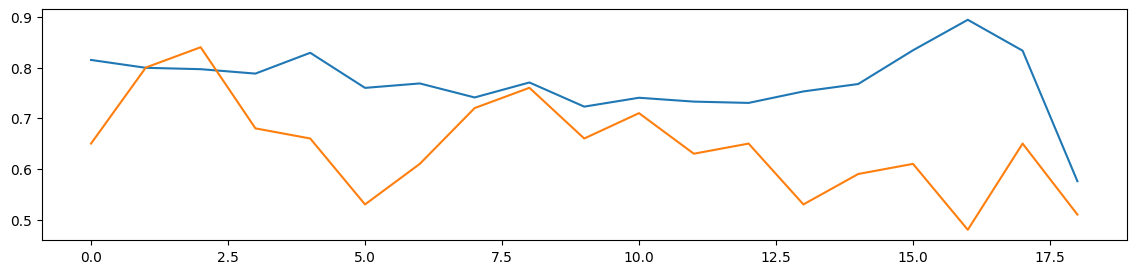

In [162]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_2.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model_2.predict(x_test)) / 2)
plt.plot(model_2.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


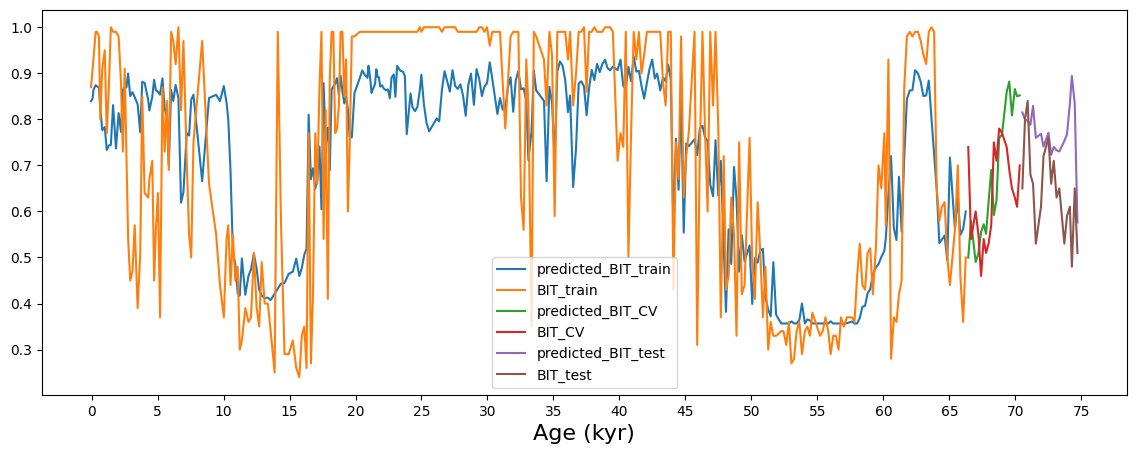

In [163]:
plt.figure(figsize=(14,5))
plt.plot(age[:n],model_2.predict(x_train), label = 'predicted_BIT_train')
plt.plot(age[:n],y_train, label = 'BIT_train')
plt.plot(age[n: n + m],model_2.predict(x_cv), label = 'predicted_BIT_CV')
plt.plot(age[n: n + m],y_cv, label = 'BIT_CV')
plt.plot(age[ n + m :], model_2.predict(x_test), label = 'predicted_BIT_test')
plt.plot(age[ n + m :], y_test, label = 'BIT_test')
plt.xticks(range(0, 80, 5))
plt.xlabel('Age (kyr)', fontsize = 16)
plt.legend()
plt.savefig("Network_test.png") 

In [89]:
history_final = model_2.fit(
    x_scaled, y,
    epochs=600
)

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0475 
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0463 
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0476 
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0485 
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0481 
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0483 
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0456 
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471 
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471 
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0439 
Epoch 13/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466 
Epoch 14/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 
Epoch 15/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

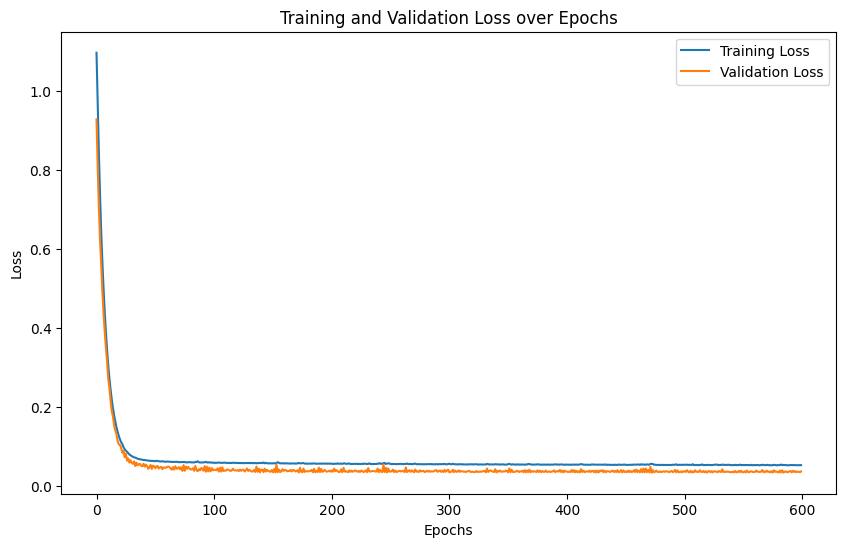

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE for the training_set: 0.014510088080216435
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE for the test_set: 0.01381731424641195
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


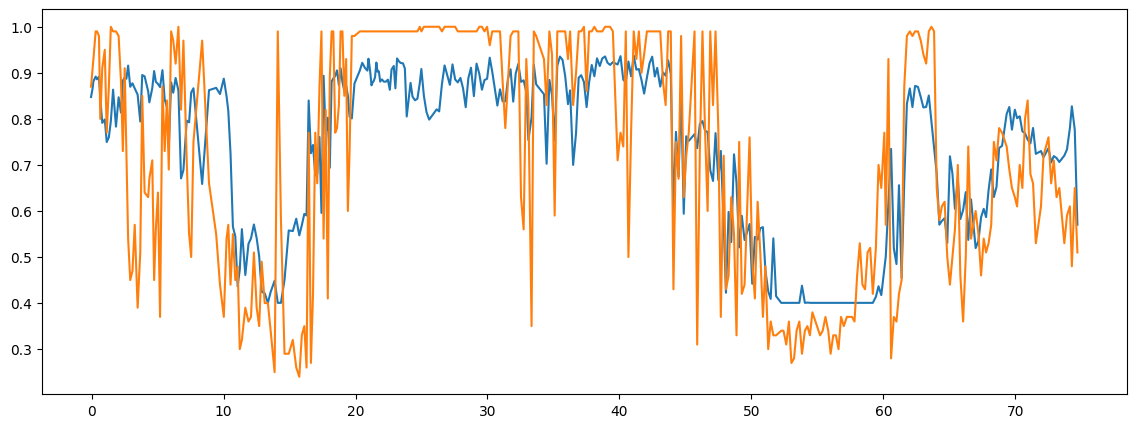

In [134]:
plt.figure(figsize=(14,5))
print("MSE for the training_set:", mean_squared_error(y_train, model_2.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y, model_2.predict(x_scaled)) / 2)
plt.plot(age, model_2.predict(x_scaled))
#print(model.predict(x_test))
plt.plot(age, y)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

In [135]:
future_df = pd.read_csv('future_data.csv')

In [136]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10 non-null     int64  
 1   Rescaled MST (°C)  10 non-null     float64
 2   CO2 (ppmv)         10 non-null     float64
 3   δ18O               10 non-null     float64
 4   d18O_benthic       10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 532.0 bytes


In [110]:
future_input = future_df.to_numpy()
future_input.shape

(10, 5)

In [111]:
future_age = np.max(age) + np.arange(1, future_input.shape[0] + 1) * 0.2
print(future_input[:, 1:])

[[ 0.91544275  4.80703402 -0.57992995 -2.23151951]
 [ 0.91242992  5.41829992 -0.52889921 -2.23410271]
 [ 0.87506196  5.23476437 -0.48256716 -2.23681963]
 [ 0.86287045  5.43959357 -0.44049849 -2.23993681]
 [ 0.83420044  5.39847943 -0.40230406 -2.24346281]
 [ 0.81808406  5.55484968 -0.36762609 -2.24699033]
 [ 0.79416906  5.60353094 -0.3361392  -2.25051388]
 [ 0.7767381   5.7308225  -0.30754843 -2.25403575]
 [ 0.75577731  5.80686421 -0.28158913 -2.25759934]
 [ 0.73819042  5.91535571 -0.2580164  -2.26115407]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.4577898 ]
 [0.40462822]
 [0.4188142 ]
 [0.40091828]
 [0.40338442]
 [0.3938659 ]
 [0.3938659 ]
 [0.3938659 ]
 [0.3938659 ]
 [0.3938659 ]]


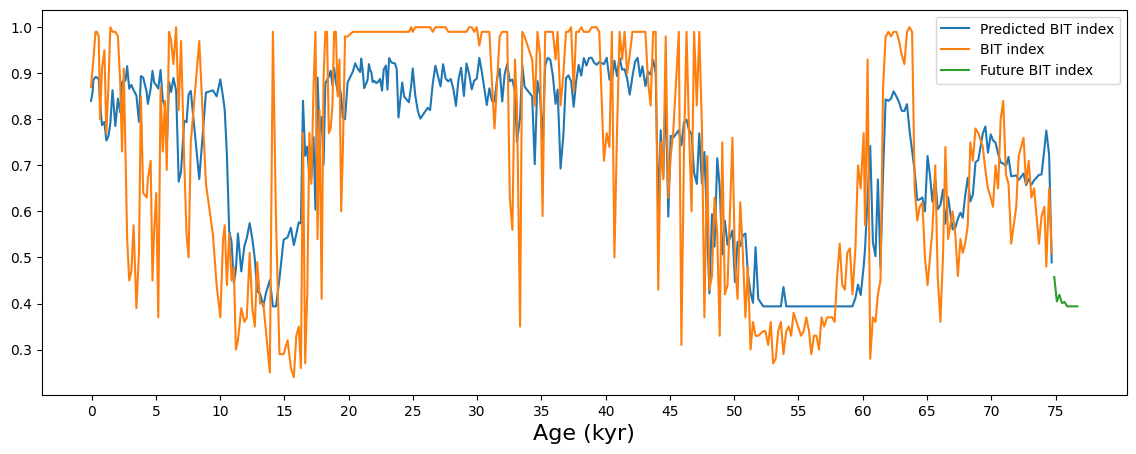

In [113]:
plt.figure(figsize=(14,5))
plt.plot(age, model_2.predict(x_scaled), label = 'Predicted BIT index')
plt.plot(age, y, label = 'BIT index')
plt.plot(future_age[: ], model_2.predict(future_input[:, 1:]), label = 'Future BIT index')
plt.xticks(range(0, 80, 5))
plt.xlabel('Age (kyr)', fontsize = 16)
plt.legend()
plt.savefig("Network_result.png") 
print(model_2.predict(future_input[:, 1:]))

In [305]:
reg = 0.01
#reg = 0.0
model_3 = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True, activation = "sigmoid")
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [306]:
model_3.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [307]:
history = model_3.fit(
    x_train,y_train,
    epochs=600
)

Epoch 1/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6044
Epoch 2/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4185 
Epoch 3/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2445 
Epoch 4/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0943 
Epoch 5/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9633 
Epoch 6/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8458 
Epoch 7/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7492 
Epoch 8/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6584 
Epoch 9/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5833 
Epoch 10/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5170 
Epoch 11/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4568 
Epoch 12/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4088 
Epoch 13/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3650 
Epoch 14/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3210 
Epoch 15/600
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

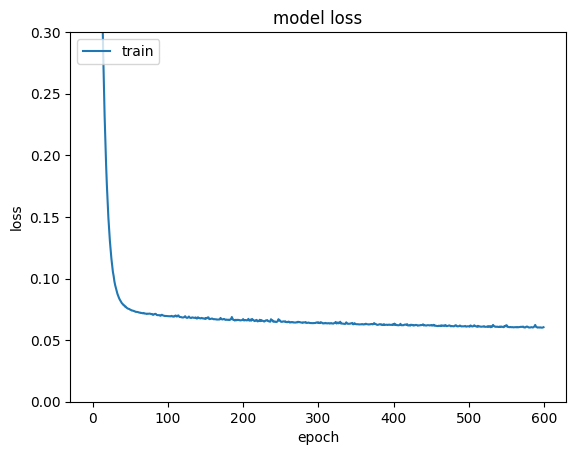

In [310]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 0.3)
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
MSE for the training_set: 0.019735704288282287
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MSE for the test_set: 0.027135061489846738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


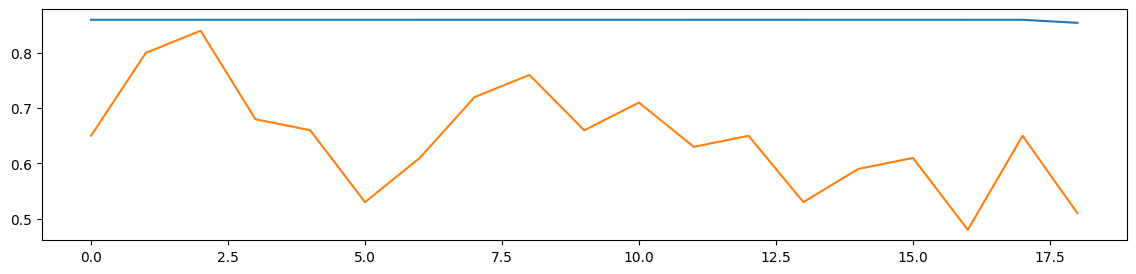

In [311]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_3.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model_3.predict(x_test)) / 2)
plt.plot(model_3.predict(x_test))
#print(model.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


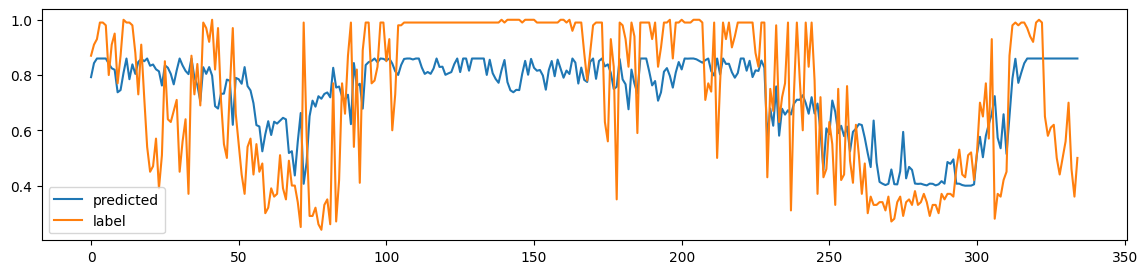

In [312]:
plt.figure(figsize=(14,3))
plt.plot(model_3.predict(x_train), label = 'predicted')
plt.plot(y_train, label = 'label')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


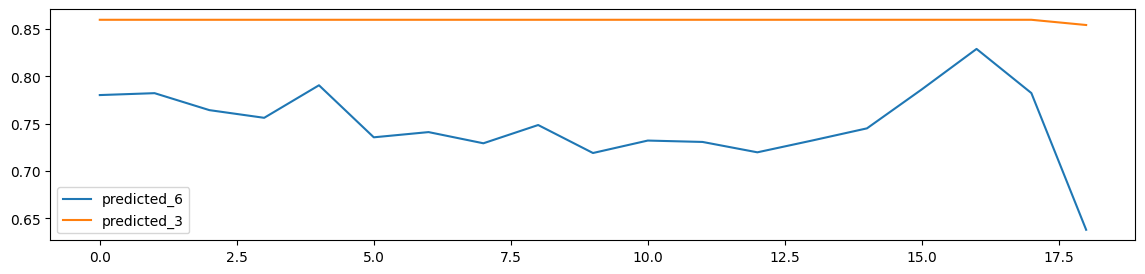

In [313]:
plt.figure(figsize=(14,3))
plt.plot(model_2.predict(x_test), label = 'predicted_6')
plt.plot(model_3.predict(x_test), label = 'predicted_3')
#plt.plot(y_train)
plt.legend()